## Importing packages

In [7]:
import sys, os
import pickle as pkl
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from prettytable import PrettyTable

sys.path.insert(0, os.path.dirname(os.path.abspath('..')))
from mass_automation.experiment import Experiment
from mass_automation.plot import plot_spectrum
from mass_automation.deisotoping.process import LinearDeisotoper, MlDeisotoper

In this notebook we are gonna compare linear deisotoping with ML-based deisotoping.

First, let's open all models and examine their structure
They are located in */data/models*. Specify your own path if necessary

In [9]:
dir_path = os.path.join(os.path.dirname(os.path.abspath('..')), 'data', 'models')

In [10]:
with open(os.path.join(dir_path, 'rf_model.pkl'), 'rb') as f:
    rf_model = pkl.load(f)
    rf_clf = rf_model['model']

with open(os.path.join(dir_path, 'xgb_model.pkl'), 'rb') as f:
    xgb_model = pkl.load(f)
    xgb_clf = xgb_model['model']

with open(os.path.join(dir_path, 'cb_model.pkl'), 'rb') as f:
    cb_model = pkl.load(f)
    cb_clf = cb_model['model']

C:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\user\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\user\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\user\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed fr

In [11]:
rf_model

{'min_distance': 0.01,
 'delta': 0.007,
 'model': RandomForestClassifier(max_depth=12, max_features=None, n_estimators=700)}

Deisotoping model is a dictionary with classifier, min_distance (minimal distance between peaks in spectrum), delta ($\delta$) for linear classification:

$|m_{a} - m_{b} - m_{neutron}| < \delta$

### Metrics comparison

To compare performance of models, let's open test dataset. It is saved in */data/datasets*

In [12]:
# Open test dataset
path = os.path.join(os.path.dirname(os.path.abspath('..')), 'data', 'datasets', 'full_test_df.pkl')
with open(path, 'rb') as f:
    test_dataset = pkl.load(f)
    test_X = test_dataset[0]
    test_targets = test_dataset[1]

In [13]:
df_teor = pd.DataFrame(test_X)
df_teor['linm'] = abs(df_teor[0]-0.998) < 0.007    # Linear model classification


rf_target_pred = rf_clf.predict(test_X)  # Random Forest model classification
xgb_target_pred = xgb_clf.predict(test_X)  # XGBoost model classification
cb_target_pred = cb_clf.predict(test_X)  # CatBoost model classification

# Predict probas
rf_target_proba = rf_clf.predict_proba(test_X)[:, 1]
xgb_target_proba = xgb_clf.predict_proba(test_X)[:, 1]
cb_target_proba = cb_clf.predict_proba(test_X)[:, 1]

Check results

In [14]:
x = PrettyTable()
x.field_names = ["ML model", "Precision", "Recall", "F1", "ROC-AUC"]
models = ['linear', 'Random Forest', 'XGBoosting', 'CatBoosting']
preds = [df_teor['linm'], rf_target_pred, xgb_target_pred, cb_target_pred]
probas = [np.zeros(len(rf_target_proba)), rf_target_proba, xgb_target_proba, cb_target_proba]
for model, pred, proba in zip(models, preds, probas):
    x.add_row([model,
               precision_score(test_targets, pred),
               recall_score(test_targets, pred),
               f1_score(test_targets, pred),
               roc_auc_score(test_targets, proba)])
print(x)

+---------------+--------------------+--------------------+--------------------+--------------------+
|    ML model   |     Precision      |       Recall       |         F1         |      ROC-AUC       |
+---------------+--------------------+--------------------+--------------------+--------------------+
|     linear    | 0.9843998266647407 | 0.9997066158134077 | 0.9919941775836971 |        0.5         |
| Random Forest | 0.9941639918295886 | 0.9995599237201115 | 0.9968546558408309 | 0.9995742940026536 |
|   XGBoosting  | 0.9953236884407424 | 0.999119847440223  | 0.9972181551976574 | 0.999708048170931  |
|  CatBoosting  | 0.9945985401459854 | 0.9994132316268153 | 0.997000073168947  | 0.9997013534564203 |
+---------------+--------------------+--------------------+--------------------+--------------------+


### Deisotoping of real spectra

Open spectra of Sonogashira reaction mixtures

<b> !! Specify paths for reaction mixes manually. Paths in the cell below are just examples !! </b>

In [15]:
with open('C:\\Users\\user\\Machine-learning-enabled-spectra-interpretation\\data\\mass_spectra\\react_mix1.pkl', 'rb') as f:
    react_mix1 = pkl.load(f)
    
with open('C:\\Users\\user\\Machine-learning-enabled-spectra-interpretation\\data\\mass_spectra\\react_mix2.pkl', 'rb') as f:
    react_mix2 = pkl.load(f)
    
with open('C:\\Users\\user\\Machine-learning-enabled-spectra-interpretation\\data\\mass_spectra\\react_mix3.pkl', 'rb') as f:
    react_mix3 = pkl.load(f)
    

Now let's deisotope!

spectrum: react_mix1, model: linear_model


100%|█████████████████████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 76735.71it/s]


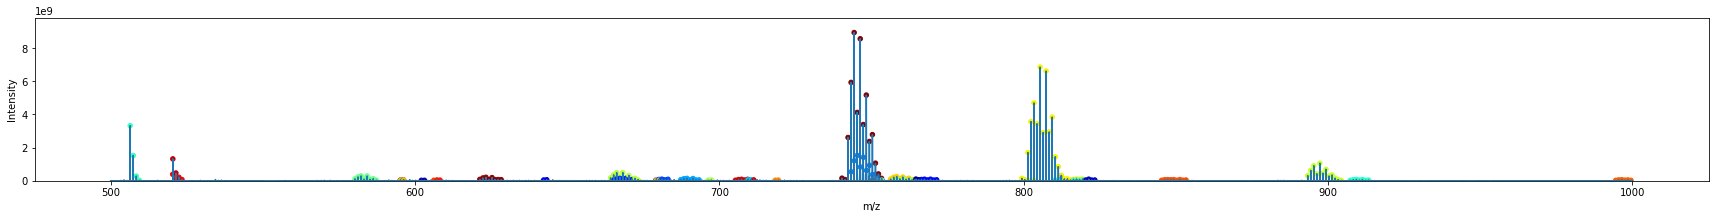

spectrum: react_mix1, model: rf_model


100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [00:28<00:00, 10.99it/s]


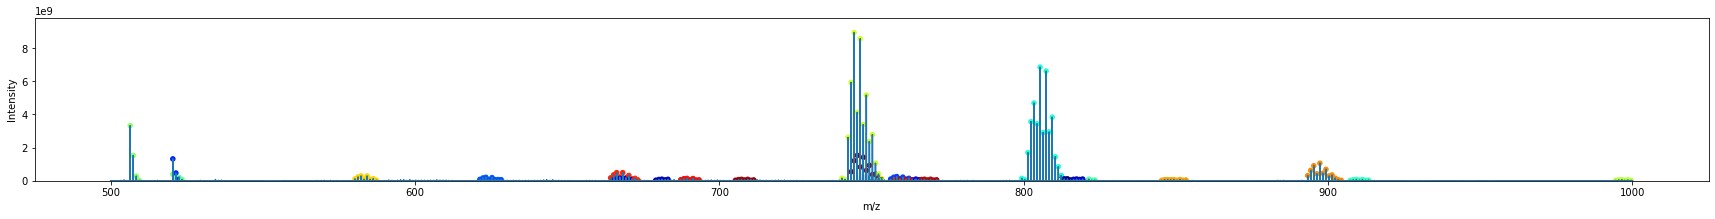

spectrum: react_mix1, model: xgb_model


100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [00:24<00:00, 12.37it/s]


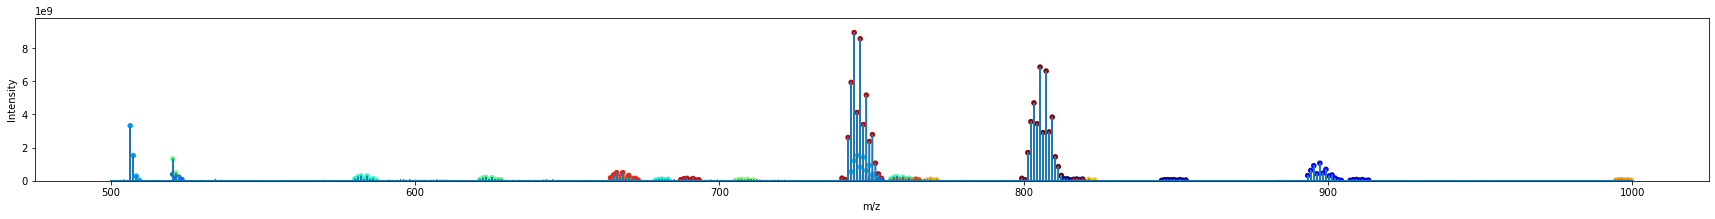

spectrum: react_mix1, model: cb_model


100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [00:20<00:00, 15.31it/s]


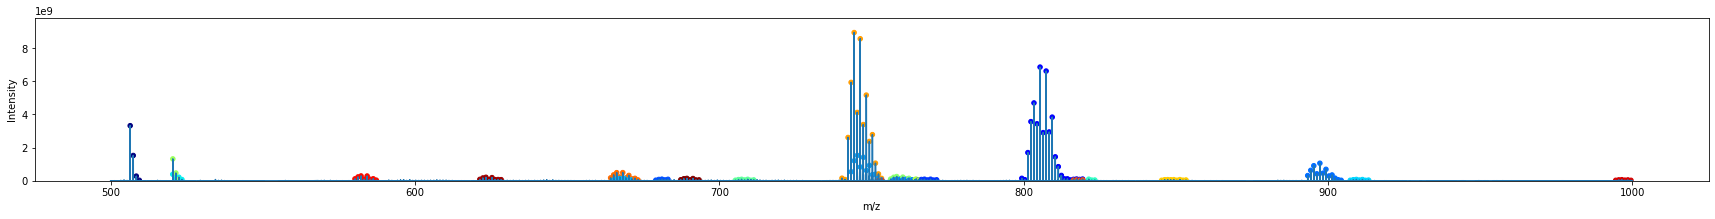

spectrum: react_mix2, model: linear_model


100%|█████████████████████████████████████████████████████████████████████████████| 785/785 [00:00<00:00, 43726.64it/s]


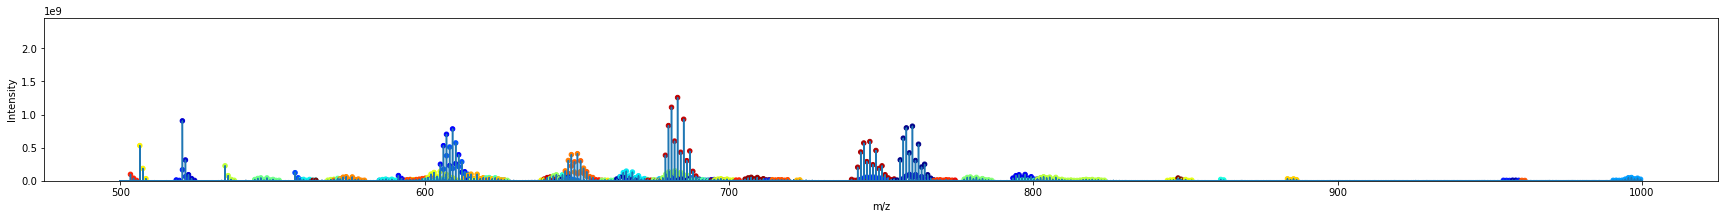

spectrum: react_mix2, model: rf_model


100%|████████████████████████████████████████████████████████████████████████████████| 785/785 [01:12<00:00, 10.78it/s]


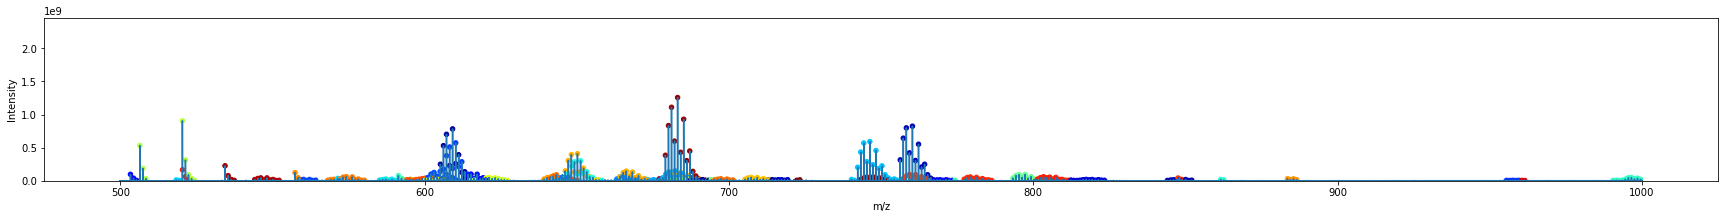

spectrum: react_mix2, model: xgb_model


100%|████████████████████████████████████████████████████████████████████████████████| 785/785 [01:11<00:00, 11.00it/s]


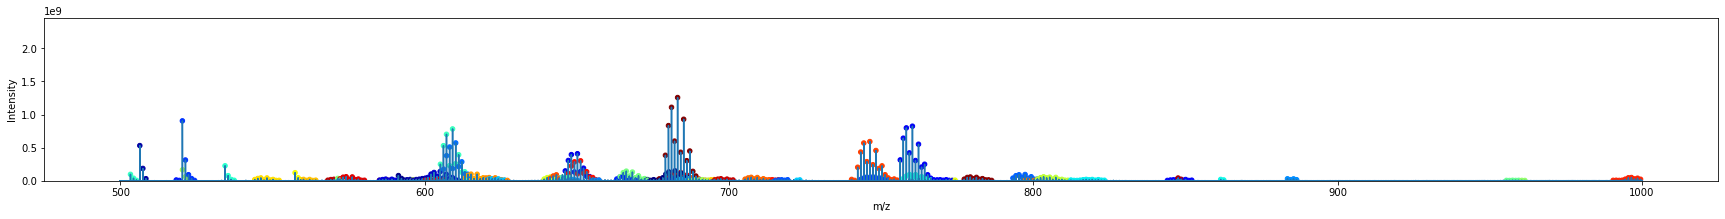

spectrum: react_mix2, model: cb_model


100%|████████████████████████████████████████████████████████████████████████████████| 785/785 [00:55<00:00, 14.24it/s]


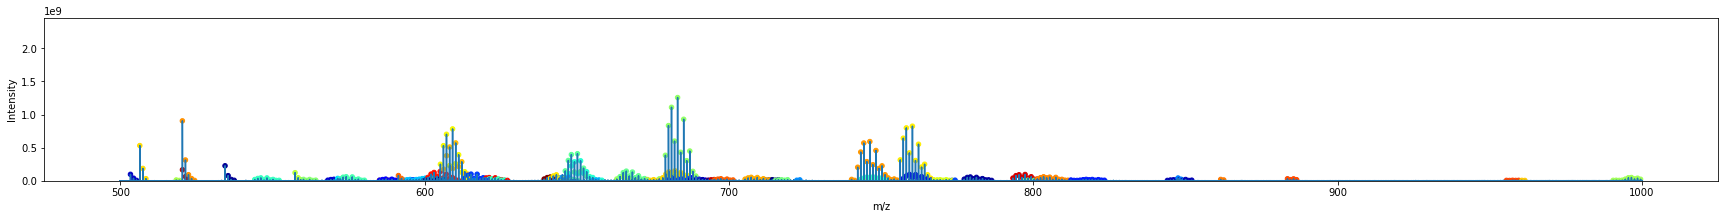

spectrum: react_mix3, model: linear_model


100%|█████████████████████████████████████████████████████████████████████████████| 745/745 [00:00<00:00, 75186.63it/s]


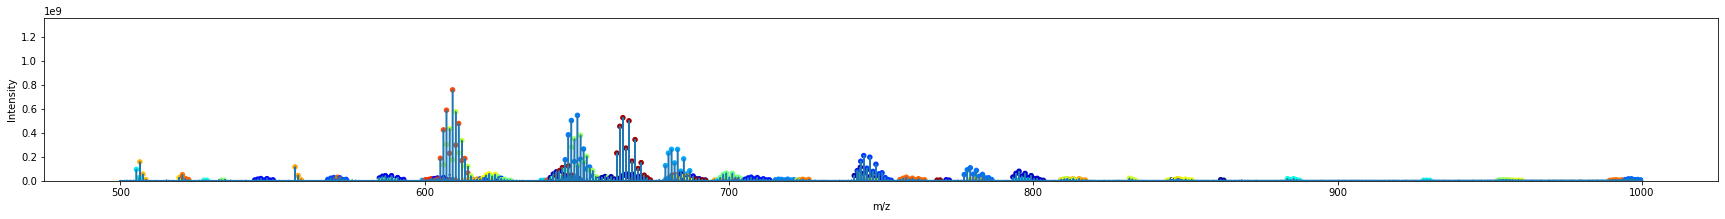

spectrum: react_mix3, model: rf_model


100%|████████████████████████████████████████████████████████████████████████████████| 745/745 [01:11<00:00, 10.48it/s]


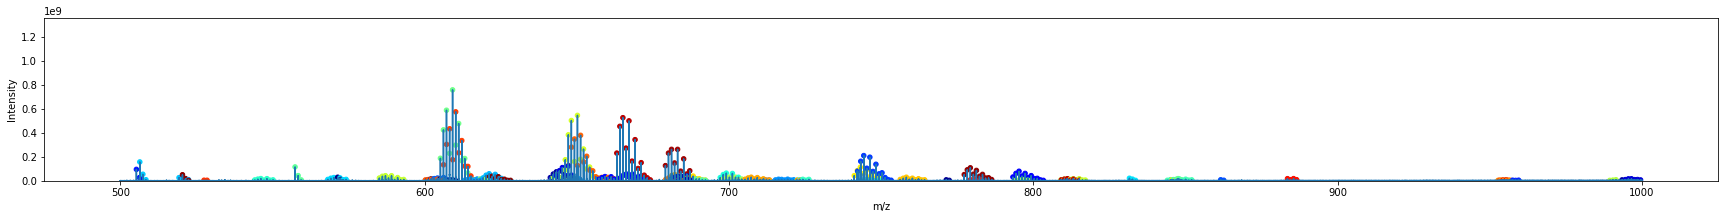

spectrum: react_mix3, model: xgb_model


100%|████████████████████████████████████████████████████████████████████████████████| 745/745 [01:04<00:00, 11.60it/s]


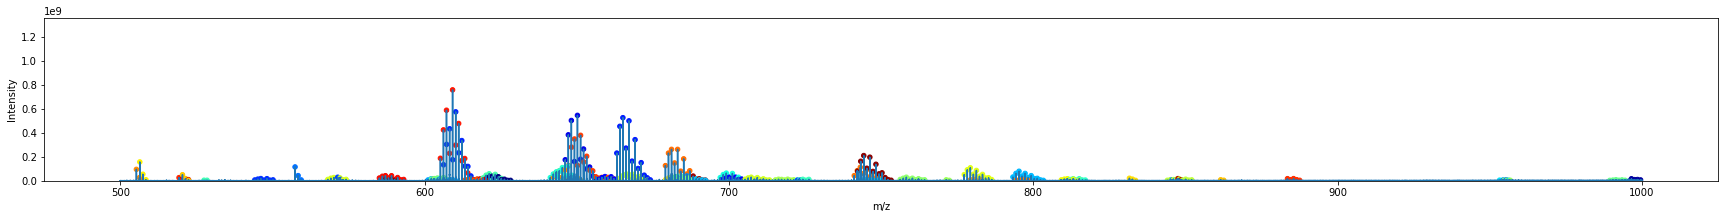

spectrum: react_mix3, model: cb_model


100%|████████████████████████████████████████████████████████████████████████████████| 745/745 [01:19<00:00,  9.38it/s]


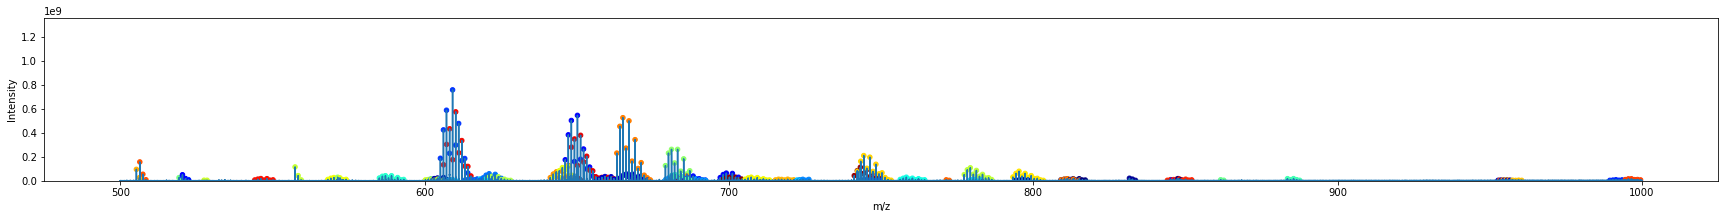

In [16]:
for spectrum, spec_name in zip([react_mix1, react_mix2, react_mix3], ['react_mix1', 'react_mix2', 'react_mix3']):
    for model in ['linear_model', 'rf_model', 'xgb_model', 'cb_model']:
        print(f'spectrum: {spec_name}, model: {model}')
        path = 'C:\\Users\\user\\Machine-learning-enabled-spectra-interpretation\\data\\models\\'+ model +'.pkl'
        if model == 'linear_model':
            lin_deisotoper = LinearDeisotoper().load(path)  # Load deisotoping model, specify path to pickle with model
            preds = lin_deisotoper(spectrum)  # Getting list of labels from deisotoping
            plot_spectrum(spectrum, labels = preds, x_left=500, x_right=1000, figsize=(30, 3))  # Visualize results
        else:
            ml_deisotoper = MlDeisotoper().load(path)
            preds = ml_deisotoper(spectrum, threshold=0.5)
            plot_spectrum(spectrum, labels = preds, x_left=500, x_right=1000, figsize=(30, 3))

We did it! (Not we, but ML, nevermind)